## 한글 형태소 분석 ,시각화, 워드 클라우드 등. 
### 형태소 분석, 품사 태깅. 
### 데이터 : 샘플 데이터 , 페이스북 전자 신문에서 크롤링 한 임시 데이터로  대체 
### 설치 가 조금 복잡함.
### 1) jdk 17 이상 2) JPype(자바, 파이썬 연결하는 도구) 3) konlpy 패키지 설치. 

## 주의사항, JPype 버전 1.4,  파이썬 버전 3.10.7 다운그레이드 
## 시스템 환경 변수 , ex) JAVA_HOME : 경로 추가 하기. jdk 17
### 변수명 : JAVA_HOME (동일하게)
### 시스템 환경 변수의 경로 값 예제: C:\Program Files\Java\jdk-17\bin
### 변수명 : Path
### 경로 : C:\Program Files\Java\jdk-17\bin

## 파이썬 3.10.x , 예) 3.10.7 버전으로 다운 받기. 
### 시스템 환경 변수 추가 작업

### 변수명 : Path
### 경로C:\Python\Python39\

### 변수명 : Path
### 경로C:\Python\Python39\Scripts

### cmd -> python -V

## 2) JPype(자바, 파이썬 연결하는 도구)
### 다운로드 사이트 주소 : https://github.com/jpype-project/jpype/releases
### JPype 검색하고, 버전은 jpype1-1.6.0-cp313-cp313-win_amd64.whl 받아서,
### 해당 다운로드 받은 폴더 이동하고, 해당 폴더 검색경로에서, cmd 실행하고, 
### cmd -> pip install jpype1-1.6.0-cp313-cp313-win_amd64.whl
### 업그레이드 경고창 뜨면 : 
### python.exe -m pip install --upgrade pip
### 업그레이드 후 , 다시 설치 
### pip install jpype1-1.6.0-cp313-cp313-win_amd64.whl
### , 명령어 붙여넣기. 
### pip install konlpy 

### 코드 실행시, 설치한(다운그레이드한 버전, 3.10.7) 선택, 
### 해당 쥬피터 노트북 관련 커널 설치도 자동으로 함. 




# 용어 정리 
## 형태소 , 형태소 분석
### 형태소: 언어에서 의미가 가장 작은 단위. 
### 형태소 분석: 형태소, 어근, 접두사/접미사, 품사 등 다양한 속성 구조. 
### 품사 태깅 예) 상용 이가 좋아 하는 음식 은 국밥 이다. 
### 음식 : NNG, 이가/JKM , 좋아하는/VV, 이다/EFN , 높임말 : 하신다 -> 신/EPH
### 품사 태깅 해주는 패키지 : Hananum, Kkma, Komoran, Okt(Twitter 제공)
### Okt , 명사 /Noun , 에/ Josa, 먹는/ Verb , 다/Eomi 

# 샘플 데이터 사용. 
# 

In [2]:
# 최초 실행 때는, 설치 후에 주석하기. 
!pip install matplotlib
!pip install wordcloud

In [3]:
import json
import re 
# Okt , 한글 품사 태깅하기위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
from wordcloud import WordCloud 



In [4]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
# inputFileName = "./etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json"
inputFileName = "./트럼프_naver_news.json"
# inputFileName = "./부산서면맛집2_naver_news.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'cnt': 1,
  'description': '로이터통신은 이날 <b>트럼프</b> 행정부 소식통들을 인용해 이같이 전하면서 특히 도널드 <b>트럼프</b> 대통령은 이날 오후 9시10분(한국시간 5일 오전 11시 10분) 시작하는 상·하원 합동회의 연설 때 협정 합의를 발표하길 희망한다는... ',
  'link': 'https://www.mk.co.kr/article/11255654',
  'org_link': 'https://www.mk.co.kr/article/11255654',
  'pDate': '2025-03-05 09:15:00',
  'title': '“싸운 건 ‘쇼’”...로이터, “미-우크라 간 광물협정 체결할 수도”'},
 {'cnt': 2,
  'description': "중국 국무원은 5일 올해 경제성장률 목표치를 '5%안팎'으로 제시했다. ※CBS노컷뉴스는 여러분의 제보로 함께 세상을 바꿉니다. 각종 비리와 부당대우, 사건사고와 미담 등 모든 얘깃거리를 알려주세요.이메일... ",
  'link': 'https://www.nocutnews.co.kr/news/6302637?utm_source=naver&utm_medium=article&utm_campaign=20250305091420',
  'org_link': 'https://www.nocutnews.co.kr/news/6302637?utm_source=naver&utm_medium=article&utm_campaign=20250305091420',
  'pDate': '2025-03-05 09:15:00',
  'title': "[속보]<b>트럼프</b>發 '무역전쟁'에도 中 올해 경제성장률 '5% 안팎' 목표"},
 {'cnt': 3,
  'description': '도널드 <b>트럼프</b> 미국 대통령 [연합뉴스]  <b>트럼프</b> 행정부의 관세전쟁이 격화하면서 뉴욕증시가 2일 연속 하락 마감했다. 4일(미국 현지시간) 뉴욕증권거래소(NYSE)에 따르면 이날 다우

In [5]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  # if "message" in item.keys():
  if "description" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함.
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["description"]) + ""
    # message = message + re.sub(r"[^\w]"," ", item["message"]) + ""
message

'로이터통신은 이날  b 트럼프  b  행정부 소식통들을 인용해 이같이 전하면서 특히 도널드  b 트럼프  b  대통령은 이날 오후 9시10분 한국시간 5일 오전 11시 10분  시작하는 상 하원 합동회의 연설 때 협정 합의를 발표하길 희망한다는    중국 국무원은 5일 올해 경제성장률 목표치를  5 안팎 으로 제시했다   CBS노컷뉴스는 여러분의 제보로 함께 세상을 바꿉니다  각종 비리와 부당대우  사건사고와 미담 등 모든 얘깃거리를 알려주세요 이메일    도널드  b 트럼프  b  미국 대통령  연합뉴스    b 트럼프  b  행정부의 관세전쟁이 격화하면서 뉴욕증시가 2일 연속 하락 마감했다  4일 미국 현지시간  뉴욕증권거래소 NYSE 에 따르면 이날 다우존스30산업평균지수는 전장보다    일부 언론에서  b 트럼프  b  행정부 인사들을 인용해 발표가 임박한 것으로 보도했지만 주무 장관은 시기상조라는 인식을 드러낸 것이다  로이터통신은 4일 현지시간   b 트럼프  b  행정부 소식통들을 인용해 양국이 광물 협정에    도널드  b 트럼프  b  미국 대통령이 개입해 타결이 임박한 것처럼 보였던 PGA 투어와 LIV 골프 통합 협상이 이른 시일 안에 마무리되기 쉽지 않다는 뜻이다   b 트럼프  b  대통령은 최근 2차례나 모너핸 커미셔너를 포함한 PGA 투어    도널드  b 트럼프  b  대통령의 예고대로 이날 주요 무역국에 대한 관세 부과에 이어 상대국들도 즉각 보복관세로 맞불을 놓으면서 글로벌 무역전쟁 우려 확대 속에 이 같은 흐름이 나타났다고 미국 경제방송     영국판  b 트럼프  b  로 불리는 나이절 패라지 영국개혁당 대표도   밴스는  틀렸다  틀렸다  틀렸다 면서 영국은 아프가니스탄에서 20년 동안  미국의 편 에 섰다고 강조했습니다  프랑스군 대령 출신인 미셸 고야도    도널드  b 트럼프  b  대통령이 파나마 운하를 미국이 소유해야 한다는 주장의 근거로 삼았던 홍콩 회사의 항만    그런데 지난해 당선된  b 트럼프  b  미

In [6]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N


['로이터',
 '통신',
 '날',
 '트럼프',
 '행정부',
 '소식통',
 '인용',
 '전하',
 '면서',
 '도널드',
 '트럼프',
 '대통령',
 '날',
 '오후',
 '한국',
 '시간',
 '오전',
 '시작',
 '상',
 '하원',
 '합동',
 '회의',
 '연설',
 '때',
 '협정',
 '합의',
 '발표',
 '희망',
 '중국',
 '국무원',
 '올해',
 '경제성장률',
 '목표',
 '안팎',
 '제시',
 '노컷뉴스',
 '여러분',
 '제보',
 '세상',
 '각종',
 '비리',
 '부당',
 '대우',
 '사건',
 '사고',
 '미담',
 '등',
 '모든',
 '얘깃',
 '거리',
 '이메일',
 '도널드',
 '트럼프',
 '미국',
 '대통령',
 '연합뉴스',
 '트럼프',
 '행정부',
 '관세',
 '전쟁',
 '격',
 '뉴욕증시',
 '연속',
 '하락',
 '마감',
 '미국',
 '현지',
 '시간',
 '뉴욕',
 '증권',
 '거래소',
 '날',
 '다우존스',
 '산업',
 '평균',
 '지수',
 '전장',
 '일부',
 '언론',
 '트럼프',
 '행정부',
 '인사',
 '인용',
 '발표',
 '임박',
 '것',
 '보도',
 '주무',
 '장관',
 '시기상조',
 '인식',
 '것',
 '로이터',
 '통신',
 '현지',
 '시간',
 '트럼프',
 '행정부',
 '소식통',
 '인용',
 '양국',
 '광물',
 '협정',
 '도널드',
 '트럼프',
 '미국',
 '대통령',
 '개입',
 '타결',
 '임박',
 '것',
 '투어',
 '골프',
 '통합',
 '협상',
 '시일',
 '안',
 '마무리',
 '뜻',
 '트럼프',
 '대통령',
 '최근',
 '차례',
 '핸',
 '너',
 '포함',
 '투어',
 '도널드',
 '트럼프',
 '대통령',
 '예고',
 '날',
 '주요',
 '무역',
 '국',
 '대한',
 '관세',
 '부과',
 '상대',

In [7]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

Counter({'트럼프': 1776,
         '대통령': 1162,
         '미국': 1001,
         '관세': 946,
         '도널드': 692,
         '캐나다': 447,
         '부과': 338,
         '멕시코': 305,
         '행정부': 287,
         '현지': 240,
         '것': 227,
         '시간': 226,
         '중국': 207,
         '날': 186,
         '전쟁': 186,
         '의': 166,
         '정책': 160,
         '대한': 155,
         '보복': 153,
         '이': 149,
         '등': 142,
         '우크라이나': 134,
         '그': 122,
         '기': 115,
         '키': 105,
         '렌스': 100,
         '젤': 99,
         '이후': 91,
         '대해': 90,
         '무역': 88,
         '수입품': 84,
         '한국': 83,
         '총리': 81,
         '트뤼': 77,
         '우려': 75,
         '발표': 71,
         '산': 71,
         '영향': 70,
         '추가': 70,
         '수': 69,
         '가운데': 68,
         '하락': 66,
         '예고': 66,
         '정부': 65,
         '백악관': 65,
         '발효': 64,
         '경제': 62,
         '뉴욕': 61,
         '발': 61,
         '조치': 61,
         '준비': 61,
  

In [8]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(80):
  if(len(str(tag))>1):
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")
word_count

{'트럼프': 1776,
 '대통령': 1162,
 '미국': 1001,
 '관세': 946,
 '도널드': 692,
 '캐나다': 447,
 '부과': 338,
 '멕시코': 305,
 '행정부': 287,
 '현지': 240,
 '시간': 226,
 '중국': 207,
 '전쟁': 186,
 '정책': 160,
 '대한': 155,
 '보복': 153,
 '우크라이나': 134,
 '렌스': 100,
 '이후': 91,
 '대해': 90,
 '무역': 88,
 '수입품': 84,
 '한국': 83,
 '총리': 81,
 '트뤼': 77,
 '우려': 75,
 '발표': 71,
 '영향': 70,
 '추가': 70,
 '가운데': 68,
 '하락': 66,
 '예고': 66,
 '정부': 65,
 '백악관': 65,
 '발효': 64,
 '경제': 62,
 '뉴욕': 61,
 '조치': 61,
 '준비': 61,
 '대응': 60,
 '협정': 59,
 '지난달': 58,
 '지난': 57,
 '시장': 57,
 '중단': 55,
 '본격': 50,
 '시작': 48,
 '회의': 48,
 '취임': 48,
 '상호': 48,
 '미르': 48,
 '로디': 47,
 '글로벌': 46,
 '우리': 46,
 '화폐': 46,
 '뉴욕증시': 44,
 '위해': 44,
 '로이터': 43,
 '장관': 43,
 '암호': 43,
 '기자': 43,
 '사진': 42}

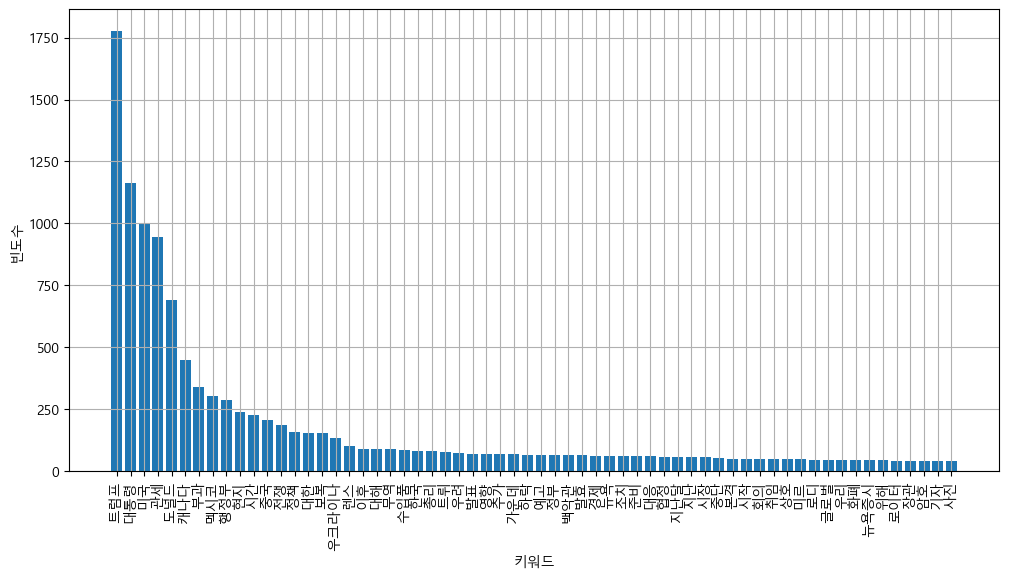

In [9]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [10]:
!pip install Numpy

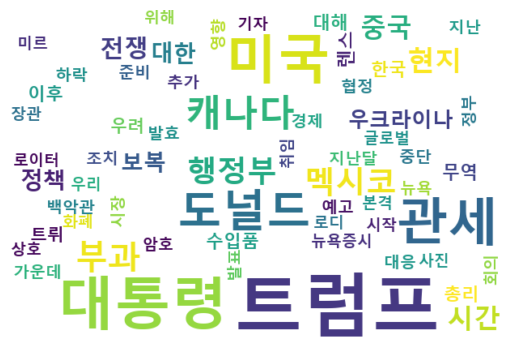

In [11]:
# 시각화2, 워드 클라우드 
import numpy as np

import os
import re
from PIL import Image
from os import path

alice_mask = np.array(Image.open("dog-test2.png"))

# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)

# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)

plt.axis("off")
plt.show()

In [12]:
# 해당 출력을 이미지로 저장 하기. 
sampleImage.to_file(inputFileName + "_cloud.jpg")